In [2]:
require(astsa)
require(forecast)

Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”
Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



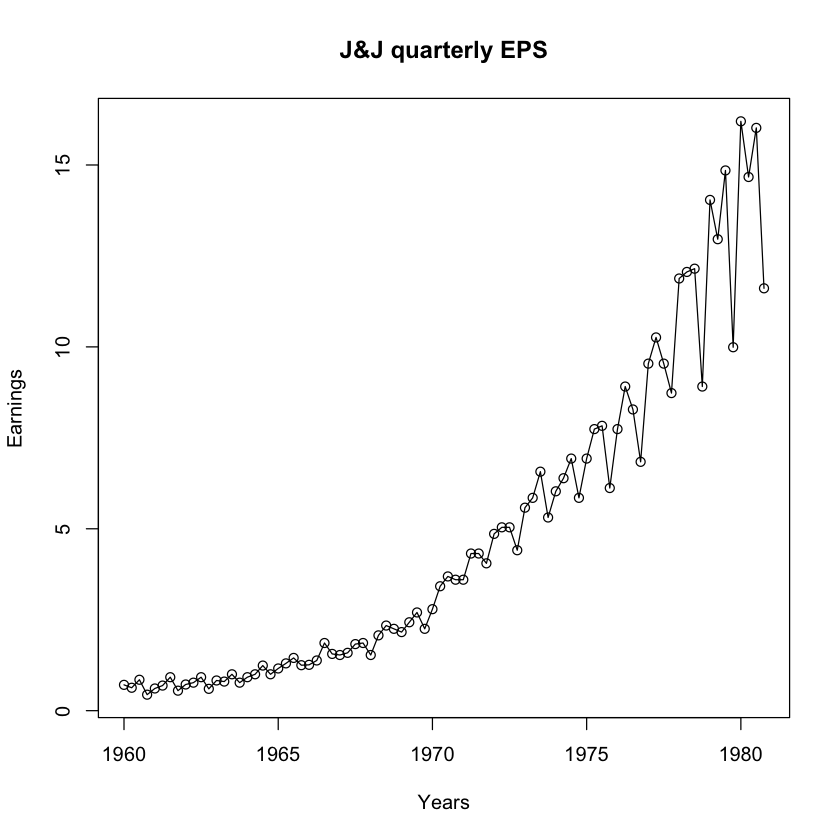

In [2]:
plot(jj, type='o', main='J&J quarterly EPS', ylab='Earnings', xlab='Years')

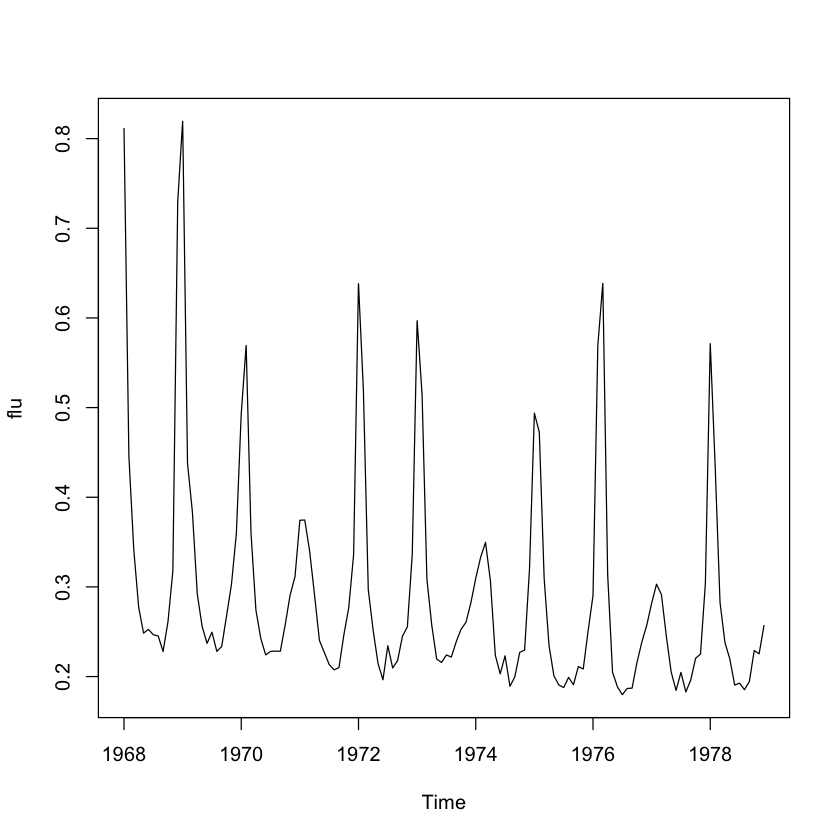

In [3]:
plot(flu)

### ACF
* We assume weak stationarity
* Correlegram

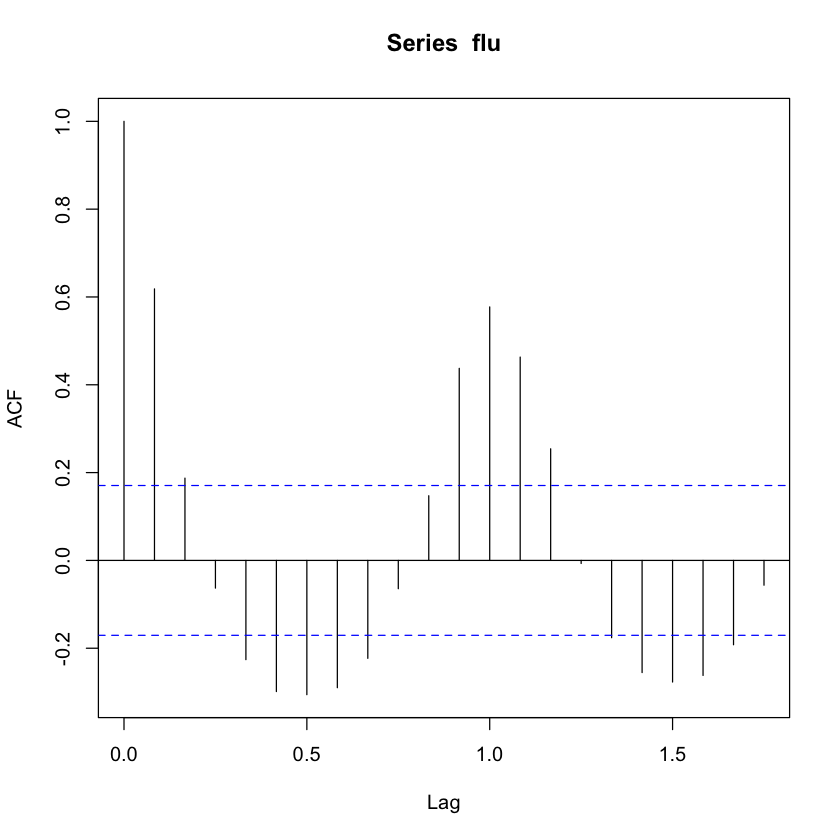

In [4]:
acf(flu)

### Week 2

Random Walks

In [2]:
x=NULL
x[1]=0
for (i in 2:1000) {
    x[i] = x[i-1] + rnorm(1)
}

In [4]:
random_walk = ts(x)

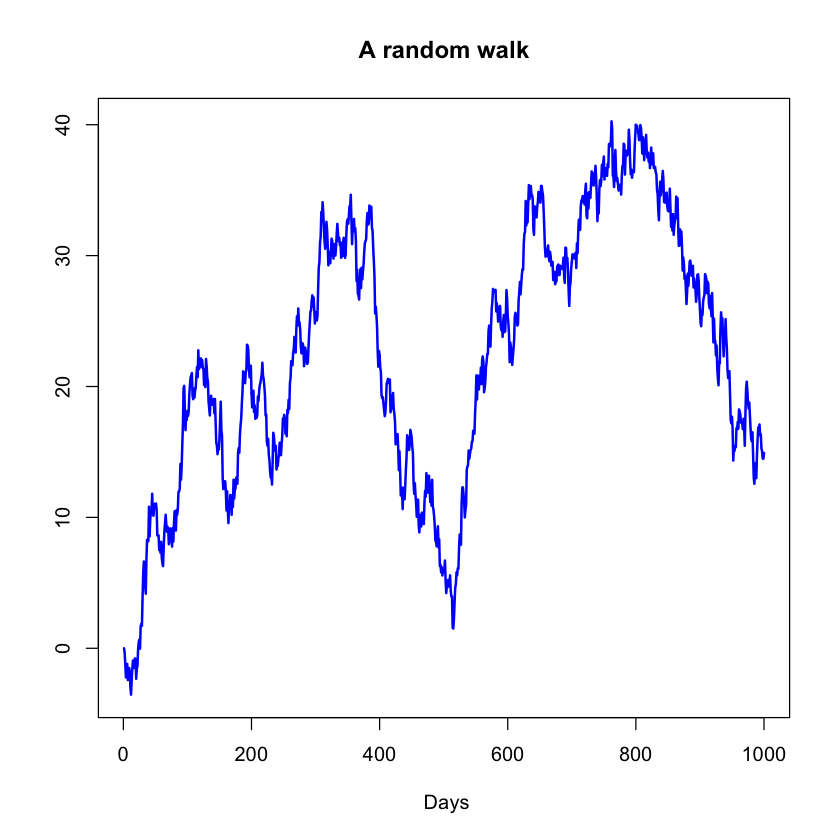

In [7]:
plot(random_walk, main = 'A random walk', ylab = ' ', xlab =' Days', col = 'blue', lwd = 2)

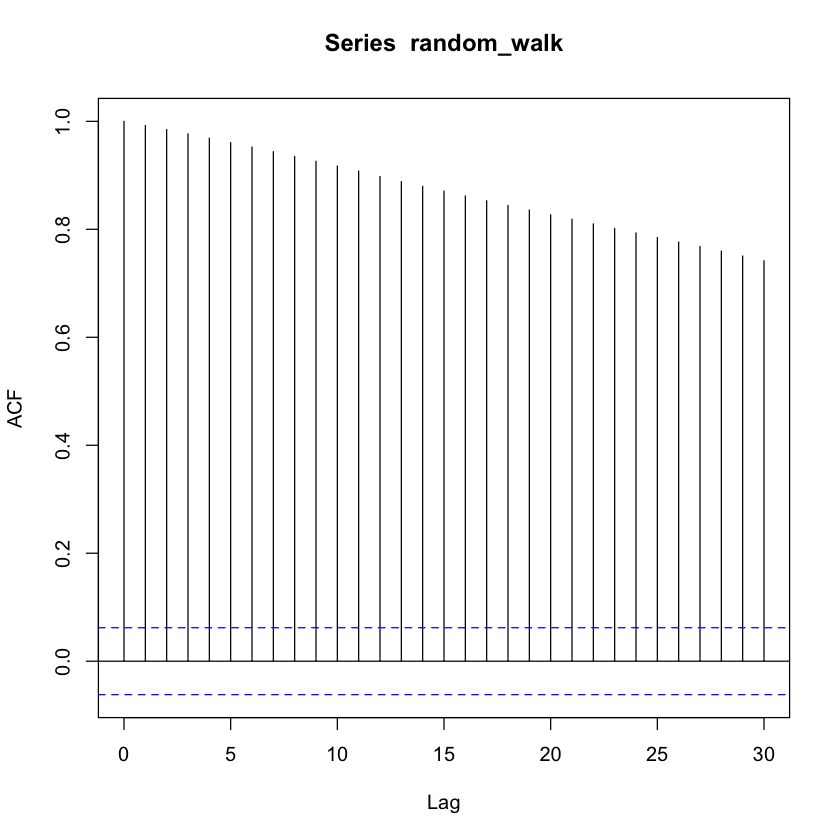

In [8]:
acf(random_walk) # Keep in mind there is no stationarity in this series

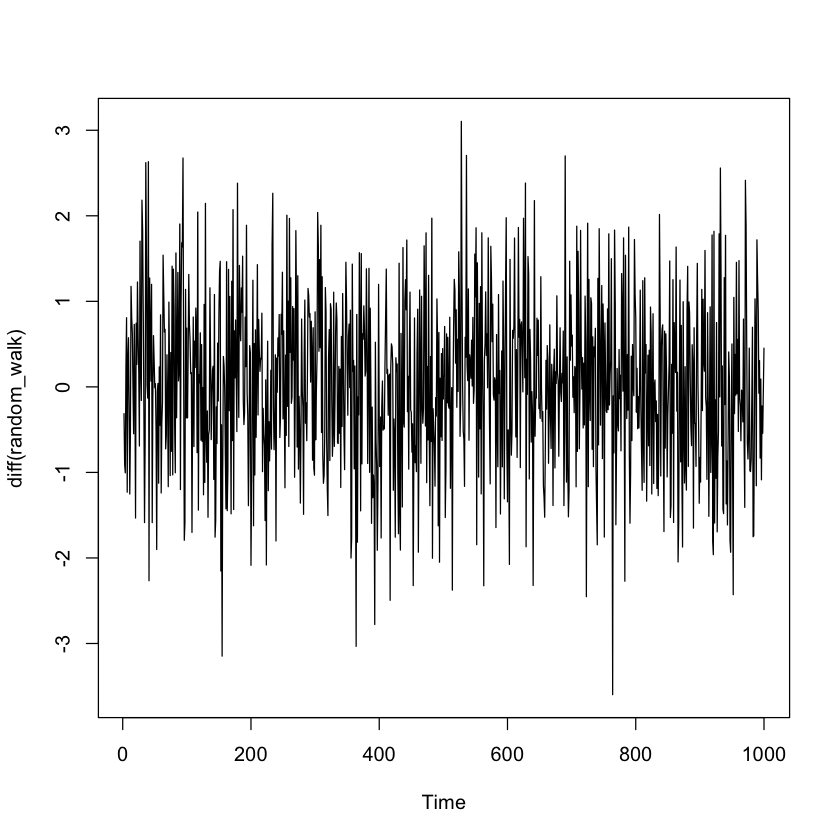

In [10]:
plot(diff(random_walk))

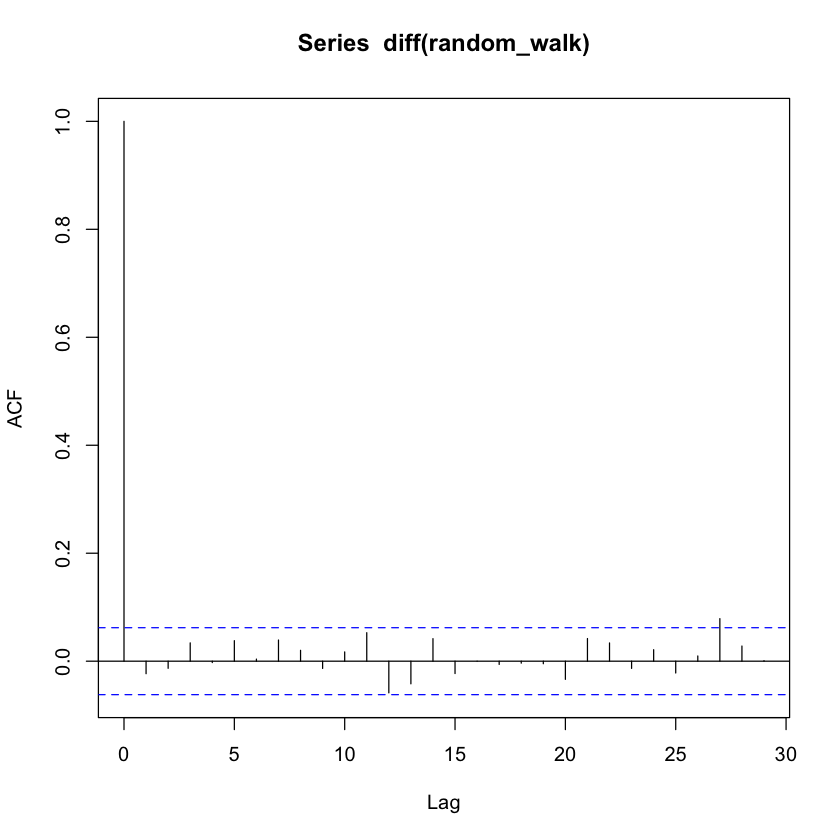

In [12]:
acf(diff(random_walk))

*Introduction to Moving Average Process* 
Best Lecture: https://d18ky98rnyall9.cloudfront.net/uyNlsNwSEea57hLNlAsNqg.processed/full/360p/index.mp4?Expires=1581897600&Signature=CFsFJrsEfo4DdjBtGwMt4-MPPXpMxxrERDI-rAUzwxxiiJtJQflW6skx6CFbQqFhvdIjozY-06tp6WHrj97fHHYEk-jzsr2~~gKUTD6D6ndRGFPXGmfSUFmVsaKmhOVlyfh72TMcS37vYgkfZgG3AXk~O4sGF30yDxTSda21spA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5Ab

* Linear combination of the shocks. I.E Stocks announcements

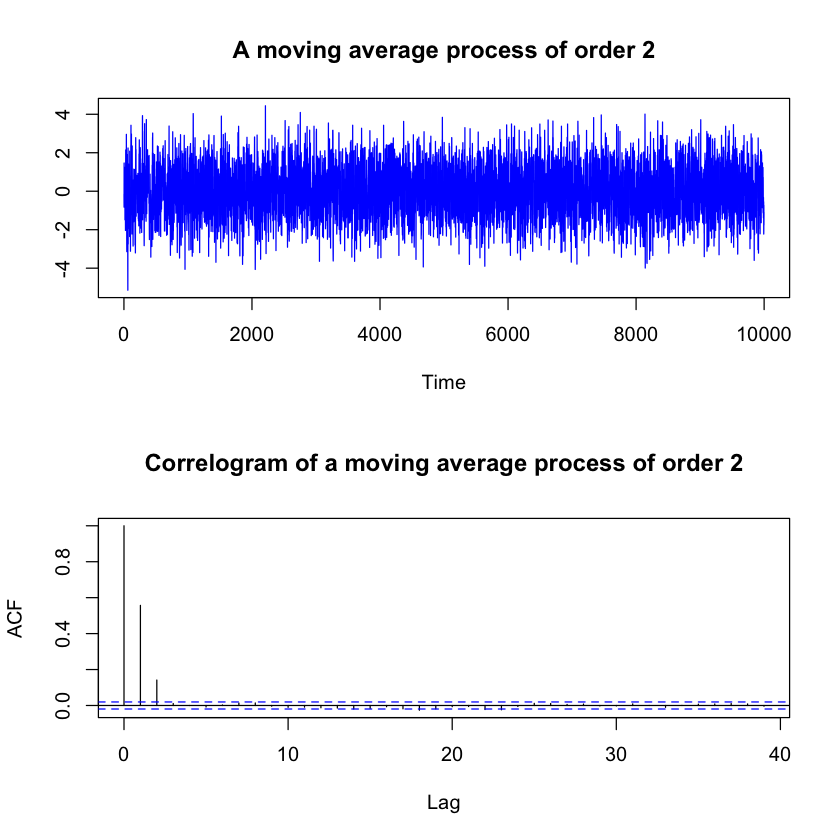

In [3]:
# Generate noise
noise=rnorm(10000)

# Introduce a variable
ma_2=NULL

# Loop for generating MA(2) process

for(i in 3:10000){
    ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
}

# Shift data to left by 2 units
moving_average_process=ma_2[3:10000]

# Put time series structure on a vanilla data
moving_average_process=ts(moving_average_process)

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(2,1))

# plot the process and plot its ACF
plot(moving_average_process, main='A moving average process of order 2', ylab=' ', col='blue')
acf(moving_average_process, main='Correlogram of a moving average process of order 2')


### week 3 - SImulating the processes

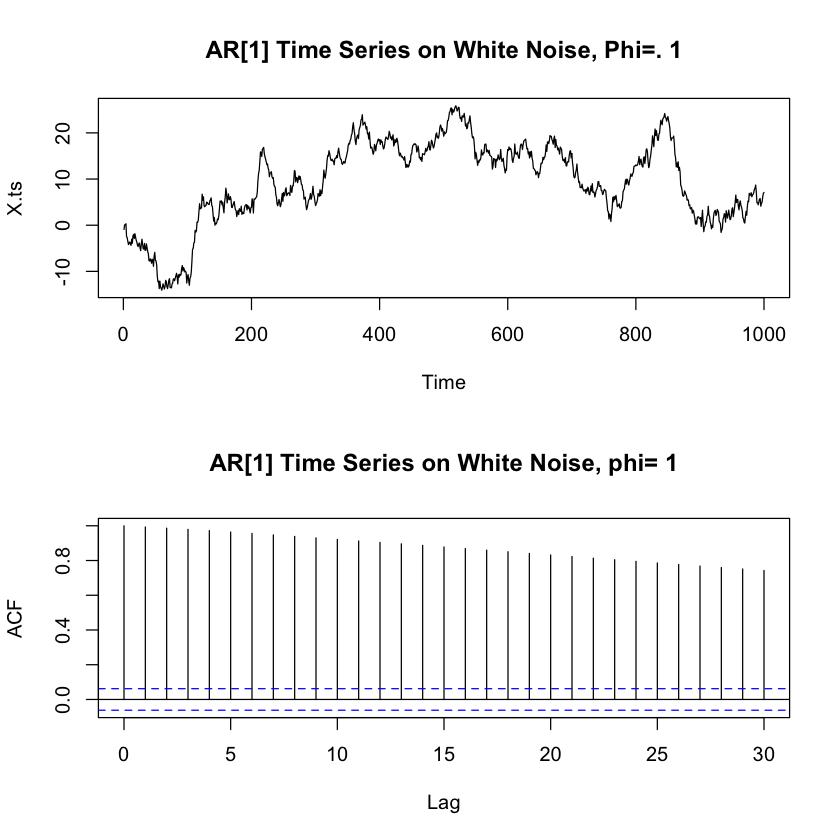

In [15]:
# Simulating an AR Series
set.seed(2016)
N=1000
phi=1
Z = rnorm(N, 0, 1) # errors
X=NULL
X[1] = Z[1]

for (t in 2:N) {
    X[t] = phi*X[t-1] + Z[t];
}

X.ts = ts(X)
par(mfrow=c(2,1))
plot(X.ts, main = paste('AR[1] Time Series on White Noise, Phi=.', phi))
x.acf = acf(X.ts, main = paste('AR[1] Time Series on White Noise, phi=', phi))

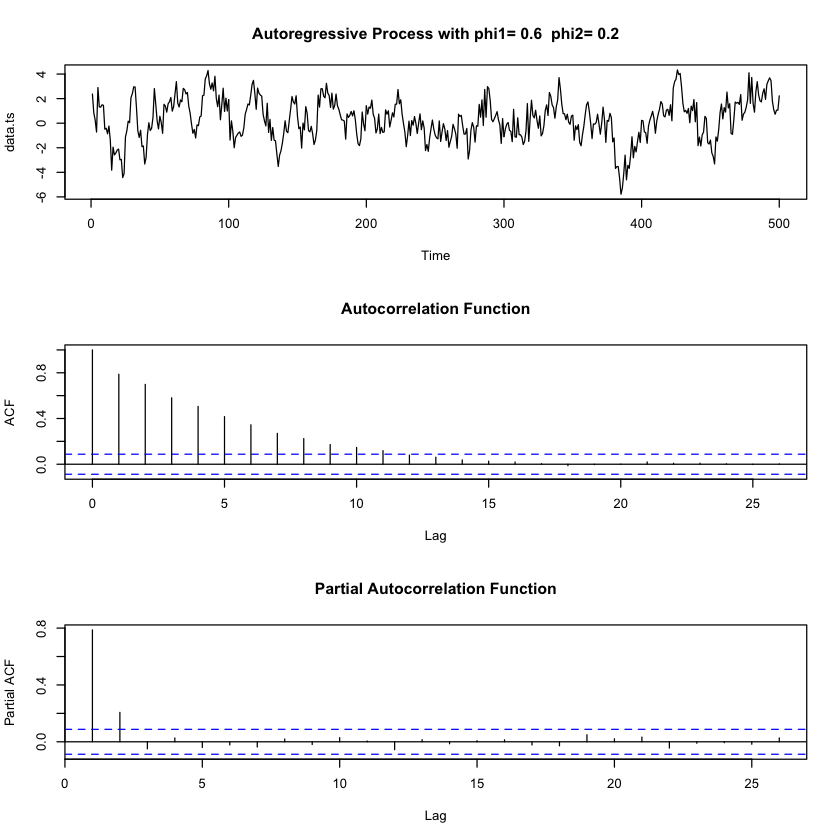

In [6]:
#rm(list=ls( all = TRUE ))
par(mfrow=c(3,1))
phi.1 = .6; phi.2 = .2; 
data.ts = arima.sim(n = 500, list(ar = c(phi.1, phi.2)))
plot(data.ts, main=
paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2) )
acf(data.ts, main="Autocorrelation Function")


In [10]:

phi.1 = .9; phi.2 = .6; phi.3 = .3;
data.ts=arima.sim(n=500, list(ar = c(phi.1,phi.2,phi.3)))

ERROR: Error in arima.sim(n = 500, list(ar = c(phi.1, phi.2, phi.3))): 'ar' part of model is not stationary


In [4]:
library(isdals)
data(bodyfat)

In [7]:
head(bodyfat)

Fat,Triceps,Thigh,Midarm
11.9,19.5,43.1,29.1
22.8,24.7,49.8,28.2
18.7,30.7,51.9,37.0
20.1,29.8,54.3,31.1
12.9,19.1,42.2,30.9
21.7,25.6,53.9,23.7


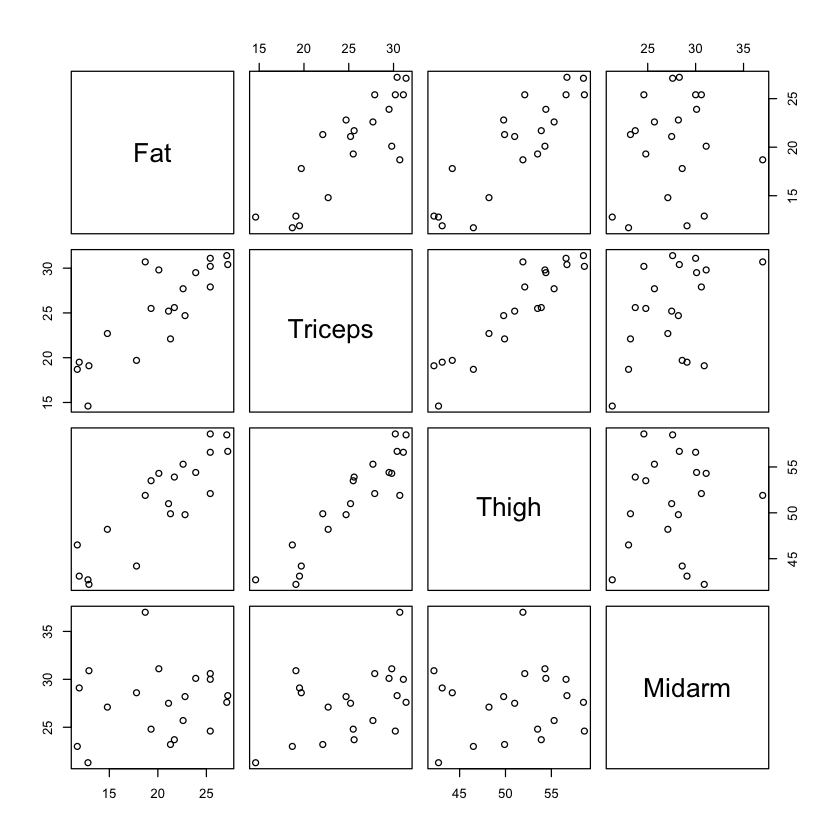

In [5]:
attach(bodyfat)
pairs( cbind( Fat, Triceps, Thigh, Midarm) )

In [6]:
cor( cbind( Fat, Triceps, Thigh, Midarm))

,Fat,Triceps,Thigh,Midarm
Fat,1.0000000,0.8432654,0.8780896,0.1424440
Triceps,0.8432654,1.0000000,0.9238425,0.4577772
Thigh,0.8780896,0.9238425,1.0000000,0.0846675
Midarm,0.1424440,0.4577772,0.0846675,1.0000000


PACFs looks at the residuals of the indivdual predictors and then looks at the correlations to 'partial out' the effects of the other variables 

In [1]:
attach(attitude);
rcl = cbind(rating, complaints, learning);
cor(rcl)

,rating,complaints,learning
rating,1.0000000,0.8254176,0.6236782
complaints,0.8254176,1.0000000,0.5967358
learning,0.6236782,0.5967358,1.0000000


In [ ]:
# How to average otu the linear effects
attach(attitude);
rating.hat = predict( lm( rating ~ learning) )
complaints.hat = predict(lm( complaints~learning) )
#### place your code on the next line ####
cor((rating-rating.hat),(complaints - complaints.hat))

# Modeling recruitment time series from 'astsa' package as an AR process

Warning message:
“package ‘astsa’ was built under R version 3.5.2”

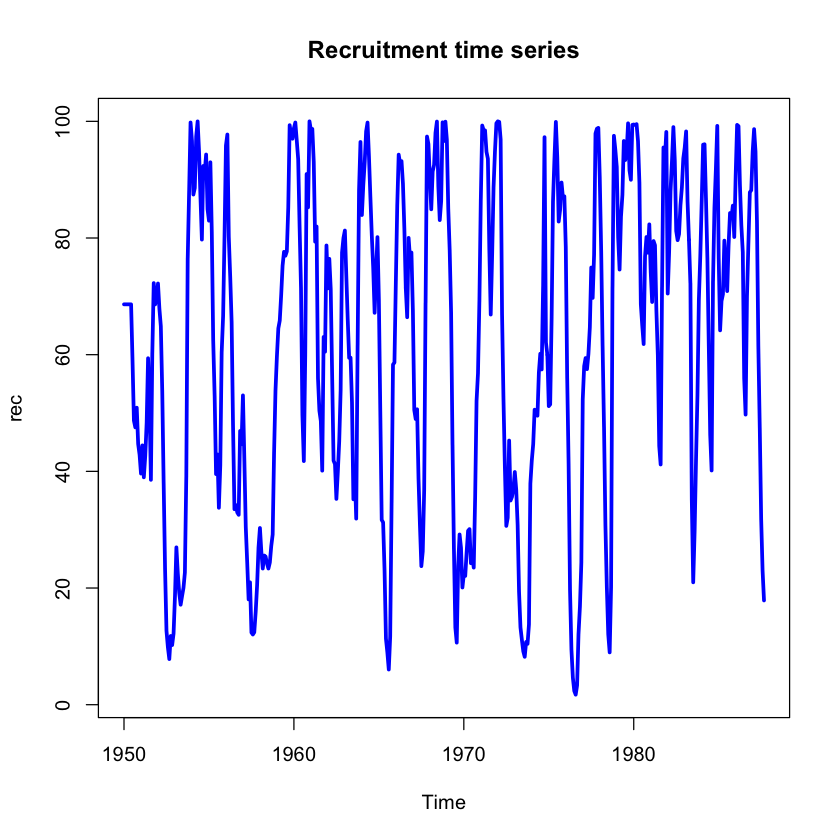

In [3]:
library(astsa)
my.data=rec

# Plot rec 
plot(rec, main='Recruitment time series', col='blue', lwd=3)

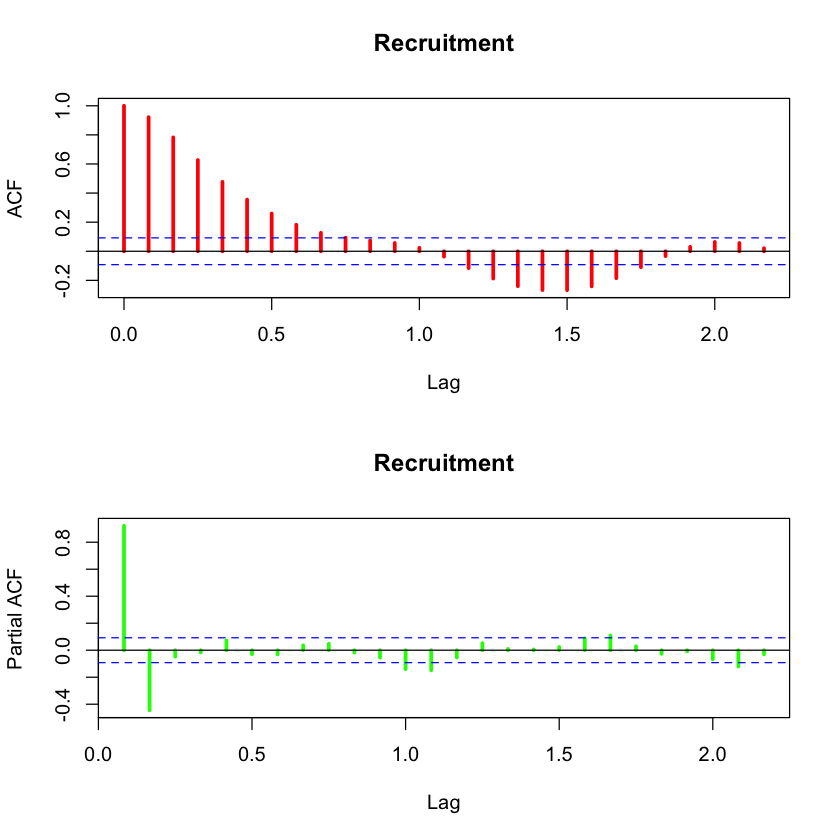

In [4]:
# subtract mean to get a time series with mean zero
ar.process=my.data-mean(my.data)

# ACF and PACF of the process`
par(mfrow=c(2,1))
acf(ar.process, main='Recruitment', col='red', lwd=3)
pacf(ar.process, main='Recruitment', col='green', lwd=3)

# ARIMA(2,1,1) Simulation

In [1]:
# parameters
phi=c(.7, .2)
beta=0.5
sigma=3
m=10000

In [2]:
set.seed(5)
(Simulated.Arima=arima.sim(n=m,list(order = c(2,1,1), ar = phi, ma=beta)))

Time Series:
Start = 1 
End = 10001 
Frequency = 1 
    [1]    0.00000000   -2.66673700   -5.15001166   -6.52584017   -7.37774221
    [6]   -7.99952058   -9.07344408   -9.73257257  -11.90184162  -13.44777780
   [11]  -14.50010526  -14.88227869  -15.73273294  -14.37240776  -12.87008668
   [16]  -11.85888544  -11.41030670  -10.22893422   -9.91164534   -9.42744035
   [21]   -7.84579157   -5.20148544   -2.15556047    0.35066847    2.00073256
   [26]    3.20437300    4.22635667    3.15743654    2.75120698    3.49651247
   [31]    4.48336095    5.36961197    7.05224597    8.62538030    7.98301579
   [36]    6.11165073    5.57661869    4.51499410    4.81077739    8.21683250
   [41]   12.09994724   14.21844317   16.60158444   17.53795219   18.35626001
   [46]   19.40063862   20.11954819   21.90150114   24.76292318   26.24684302
   [51]   25.55567608   25.60626811   26.32315792   26.58010749   27.94642917
   [56]   28.20938164   26.54209414   26.05542579   24.07704663   20.36463279
   [61]   16

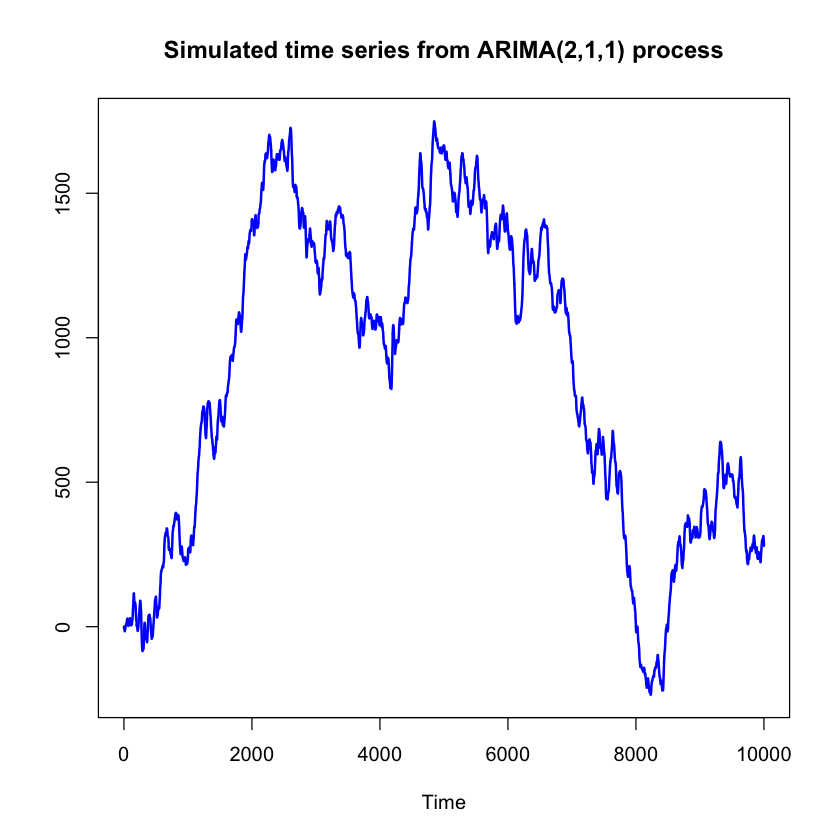

In [3]:
plot(Simulated.Arima, ylab=' ',main='Simulated time series from ARIMA(2,1,1) process', col='blue', lwd=2)

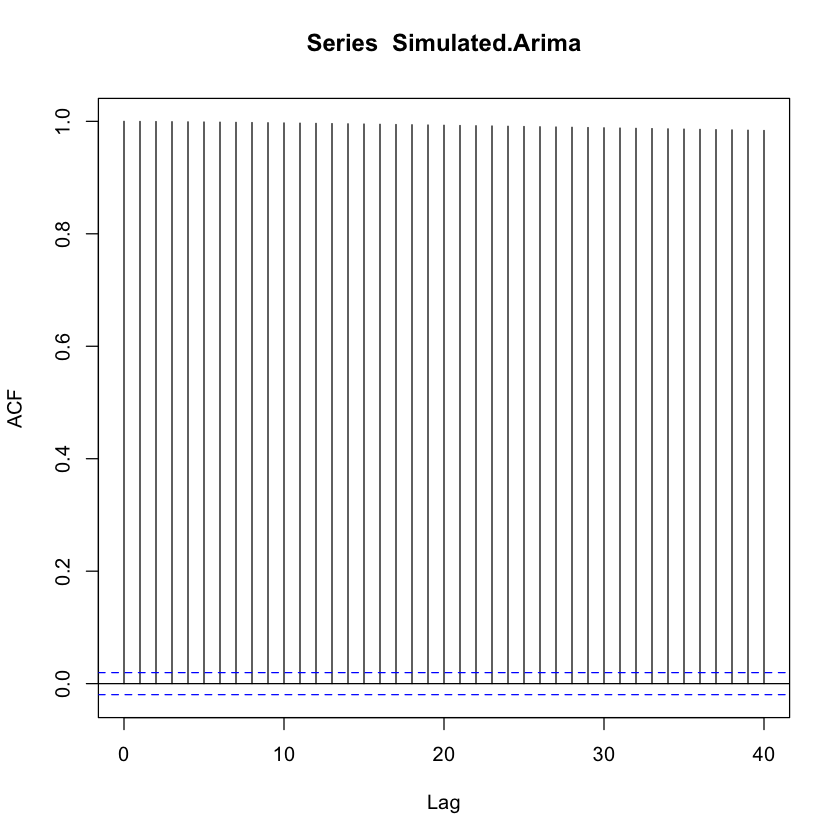

In [4]:
acf(Simulated.Arima)

In [5]:
Diff.Simulated.Arima=diff(Simulated.Arima)

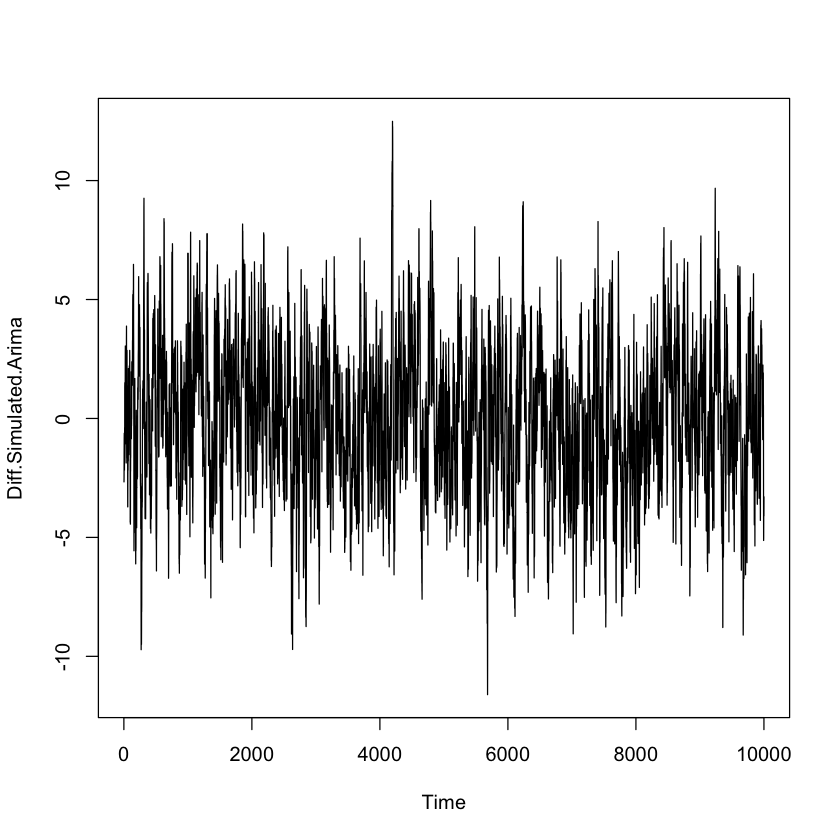

In [6]:
plot(Diff.Simulated.Arima)

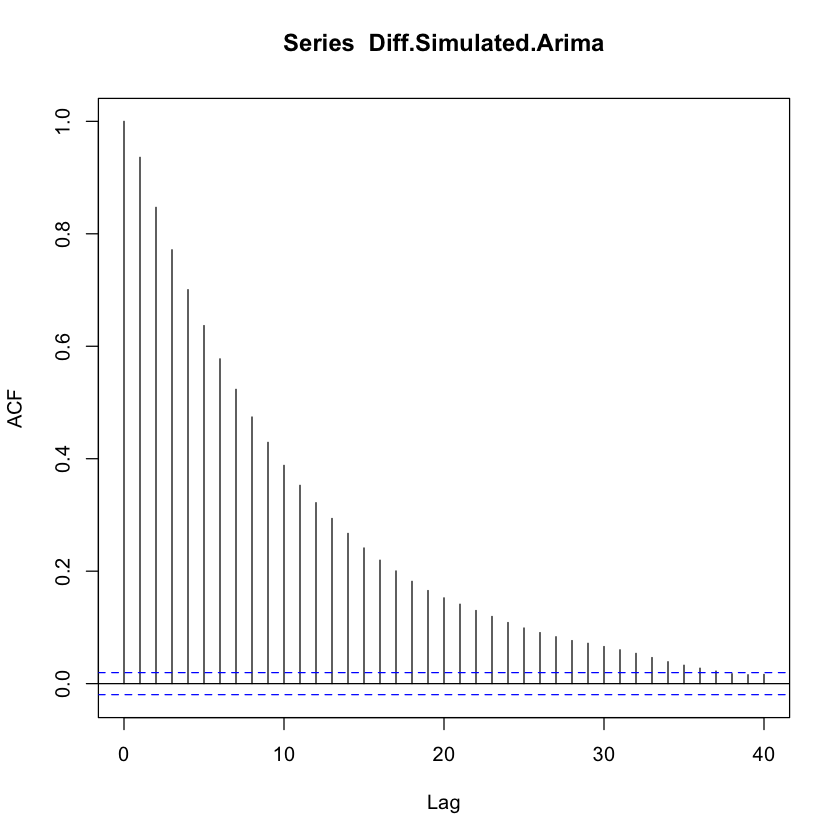

In [7]:
acf(Diff.Simulated.Arima)

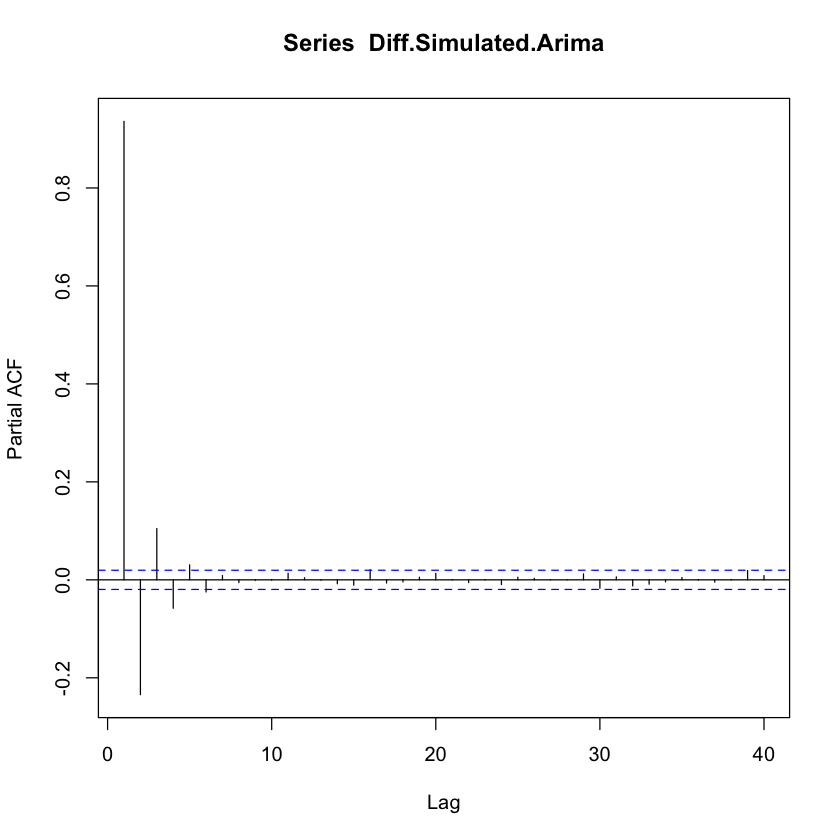

In [8]:
pacf(Diff.Simulated.Arima)

Warning message:
“package ‘astsa’ was built under R version 3.5.2”

initial  value 1.092704 
iter   2 value 0.655083
iter   3 value 0.576329
iter   4 value 0.250793
iter   5 value 0.124855
iter   6 value 0.033738
iter   7 value 0.013225
iter   8 value 0.012554
iter   9 value 0.012517
iter  10 value 0.012292
iter  11 value 0.012267
iter  12 value 0.012258
iter  13 value 0.012170
iter  14 value 0.012069
iter  15 value 0.011860
iter  16 value 0.011703
iter  17 value 0.011609
iter  18 value 0.011601
iter  19 value 0.011601
iter  20 value 0.011601
iter  20 value 0.011601
iter  20 value 0.011601
final  value 0.011601 
converged
initial  value 0.011653 
iter   2 value 0.011653
iter   3 value 0.011653
iter   3 value 0.011653
iter   3 value 0.011653
final  value 0.011653 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1    ar2     ma1  constant
      0.6876  0.204  0.5002    0.0280
s.e.  0.0334  0.032  0.0301    0.1398

sigma^2 estimated as 1.023:  log likelihood = -14305.92,  aic = 28621.83

$degrees_of_freedom
[1] 9996

$ttable
         Estimate     SE t.value p.value
ar1        0.6876 0.0334 20.5786  0.0000
ar2        0.2040 0.0320  6.3817  0.0000
ma1        0.5002 0.0301 16.6139  0.0000
constant   0.0280 0.1398  0.2001  0.8414

$AIC
[1] 2.862183

$AICc
[1] 2.862183

$BIC
[1] 2.865788


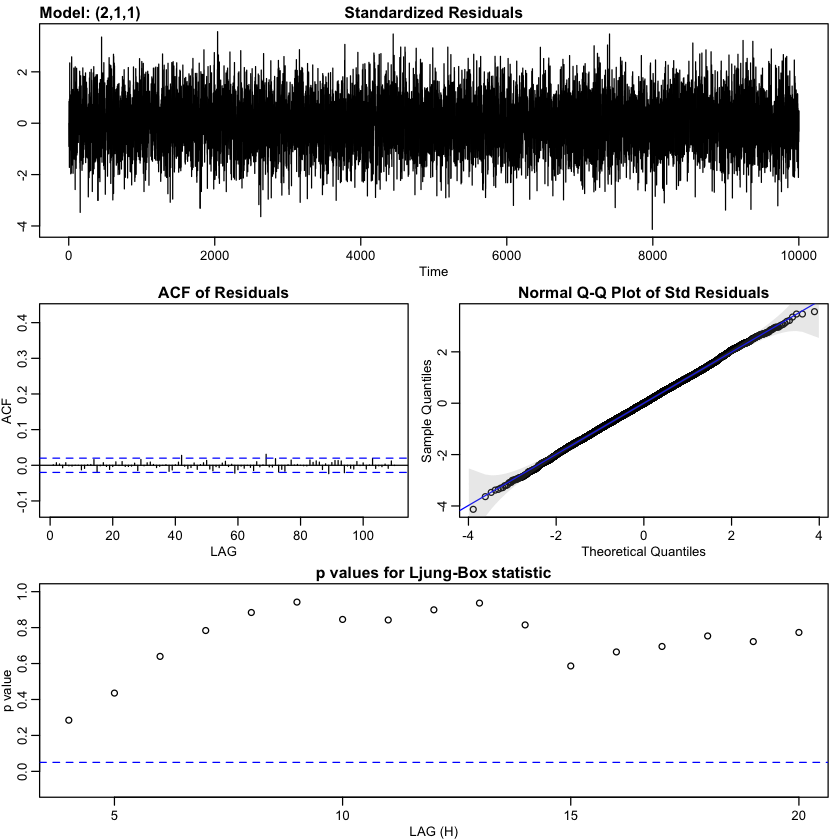

In [9]:
library(astsa)
sarima(Simulated.Arima,2,1,1,0,0,0) # astsa not installed

In [10]:
library(forecast)
auto.arima(Simulated.Arima) # forecast not installed

Warning message:
“package ‘forecast’ was built under R version 3.5.2”
Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



Series: Simulated.Arima 
ARIMA(4,2,0) 

Coefficients:
         ar1      ar2     ar3      ar4
      0.2279  -0.1633  0.0337  -0.0707
s.e.  0.0100   0.0102  0.0102   0.0100

sigma^2 estimated as 1.064:  log likelihood=-14495.62
AIC=29001.24   AICc=29001.25   BIC=29037.29

In [11]:
fit1<-arima(Diff.Simulated.Arima, order=c(4,0,0))

In [12]:
fit1


Call:
arima(x = Diff.Simulated.Arima, order = c(4, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4  intercept
      1.1862  -0.3761  0.1733  -0.0581     0.0280
s.e.  0.0100   0.0154  0.0154   0.0100     0.1353

sigma^2 estimated as 1.025:  log likelihood = -14313.1,  aic = 28638.2

In [13]:
fit2<-arima(Diff.Simulated.Arima, order=c(2,0,1))

In [14]:
fit2


Call:
arima(x = Diff.Simulated.Arima, order = c(2, 0, 1))

Coefficients:
         ar1    ar2     ma1  intercept
      0.6876  0.204  0.5002     0.0280
s.e.  0.0334  0.032  0.0301     0.1398

sigma^2 estimated as 1.023:  log likelihood = -14305.92,  aic = 28621.83

In [15]:
fit3<-arima(Simulated.Arima, order=c(2,1,1))

In [16]:
fit3


Call:
arima(x = Simulated.Arima, order = c(2, 1, 1))

Coefficients:
         ar1     ar2     ma1
      0.6876  0.2039  0.5001
s.e.  0.0334  0.0320  0.0301

sigma^2 estimated as 1.023:  log likelihood = -14305.93,  aic = 28619.85

## The following time series is taken from Time Series Data Library (TSDL)
## TSDL  was created by Rob Hyndman
## Professor of Statistics at Monash University, Australia.
## ==============================================================

## ====== Daily total female birth in California, 1959 =======

## Data is exported as csv file to the wroking directory
## Link: https://datamarket.com/data/list/?q=cat:fwy%20provider:tsdl

In [27]:
library(astsa)

# read data to R variable
birth.data<-read.csv("daily-total-female-births-in-cal.csv")

# pull out number of births column
number_of_births<-birth.data$Daily.total.female.births.in.California..1959

# use date format for dates
birth.data$Date <- as.Date(birth.data$Date, "%m/%d/%Y")



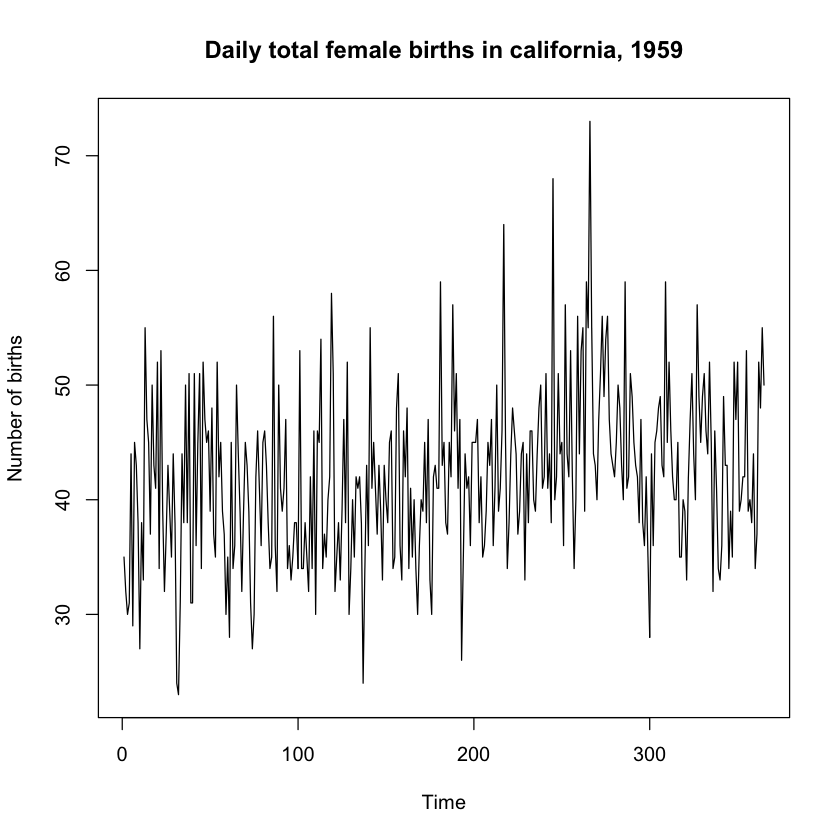

In [28]:
plot.ts(number_of_births,main='Daily total female births in california, 1959', ylab = 'Number of births')

In [21]:
# Test for correlation
Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


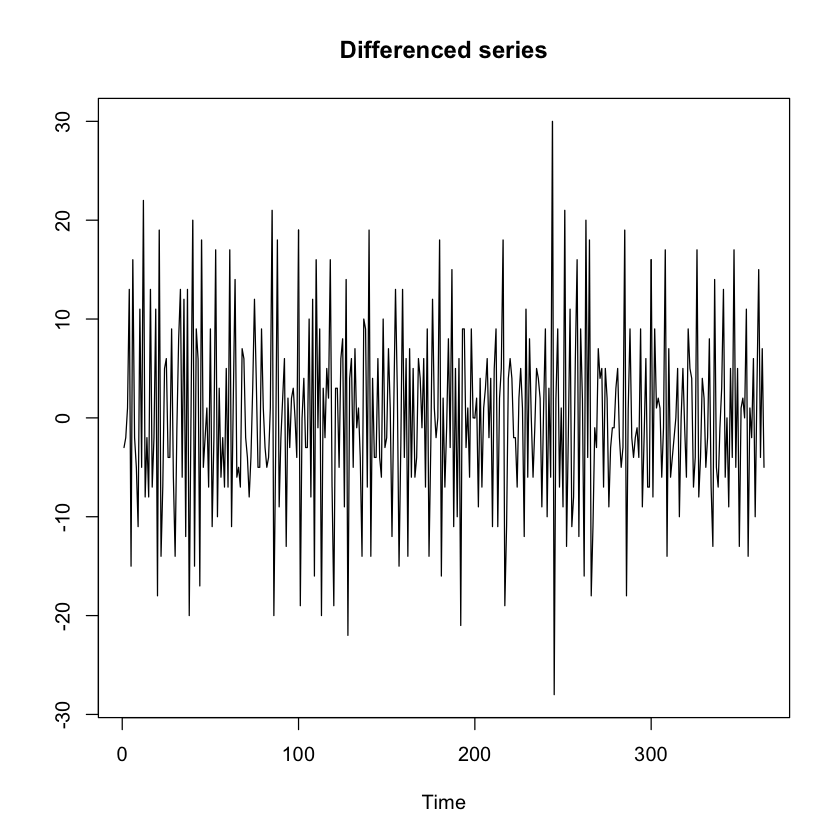

In [22]:
# Plot the differenced data
plot.ts(diff(number_of_births), main='Differenced series', ylab = '')

In [23]:
# Test for correlation in the differenced data
Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


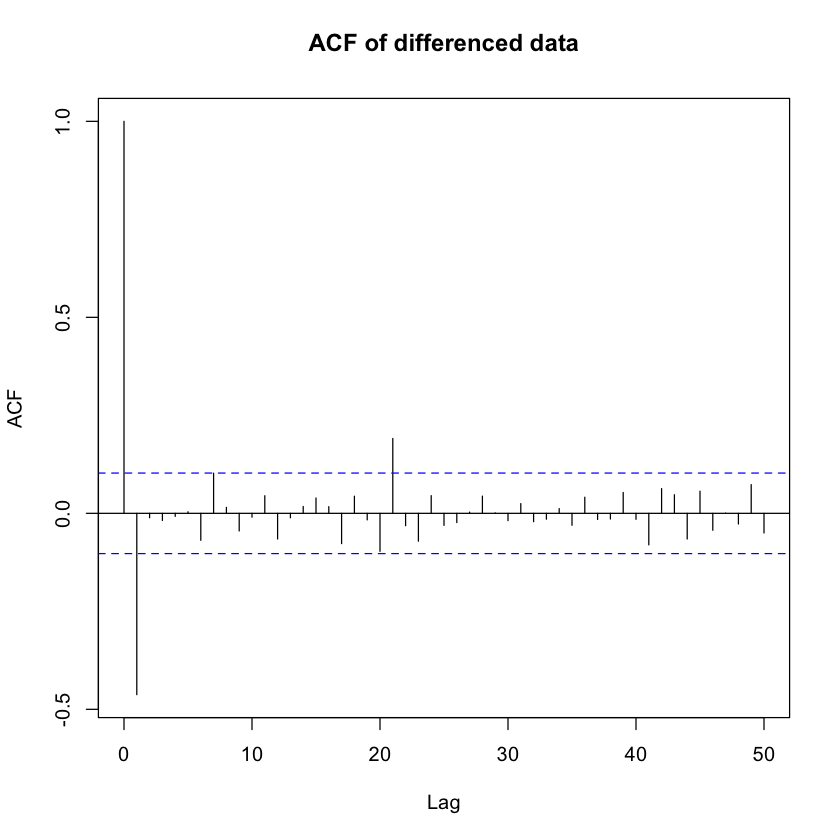

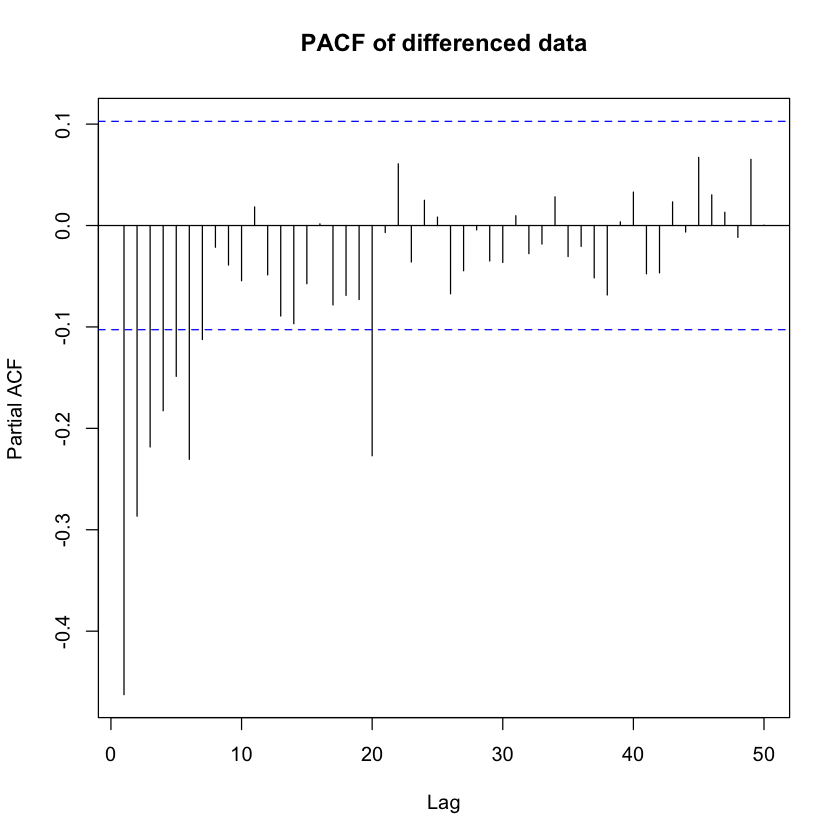

In [24]:
# acf and pacf of the differenced data

acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

In [25]:
# Fit various ARIMA models


model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')



format(df, scientific=FALSE)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578105
p-value,0.5333604,0.9859227,0.9999899,0.9999929


initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 6.760225

$AICc
[1] 6.760408

$BIC
[1] 6.803051


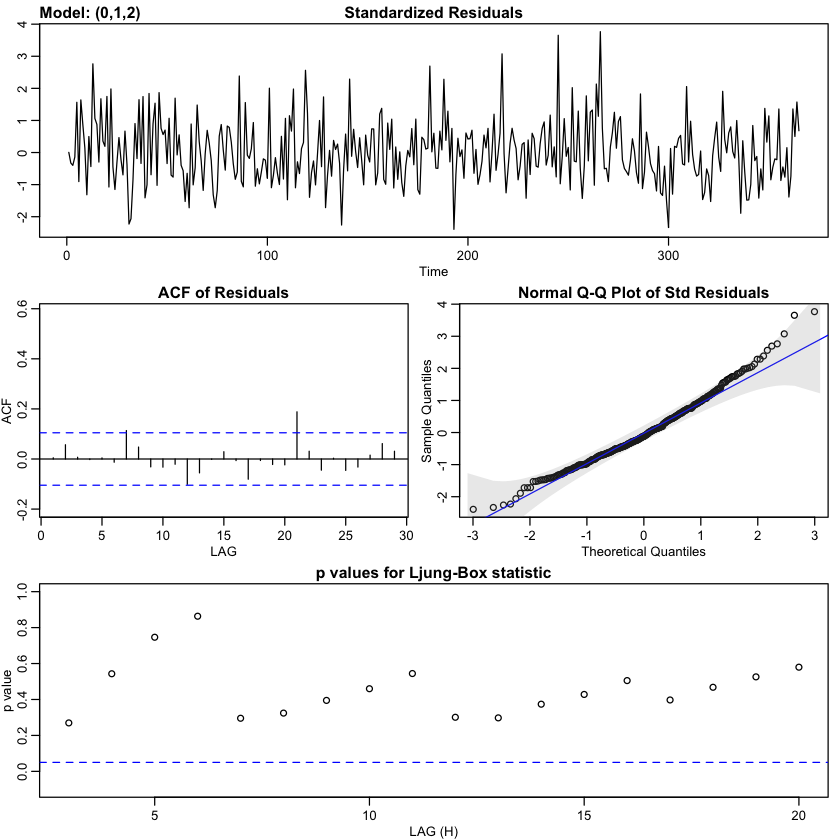

In [26]:
# Fit a SARIMA model

sarima(number_of_births, 0,1,2,0,0,0)


### Week 6 - SARIMA

In [29]:
library(astsa)

d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}


0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.707918 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400205 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.2200484 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.594822 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.7195469 


In [42]:
library(astsa)
library(forecast)
library(fma)
suv <- fancy

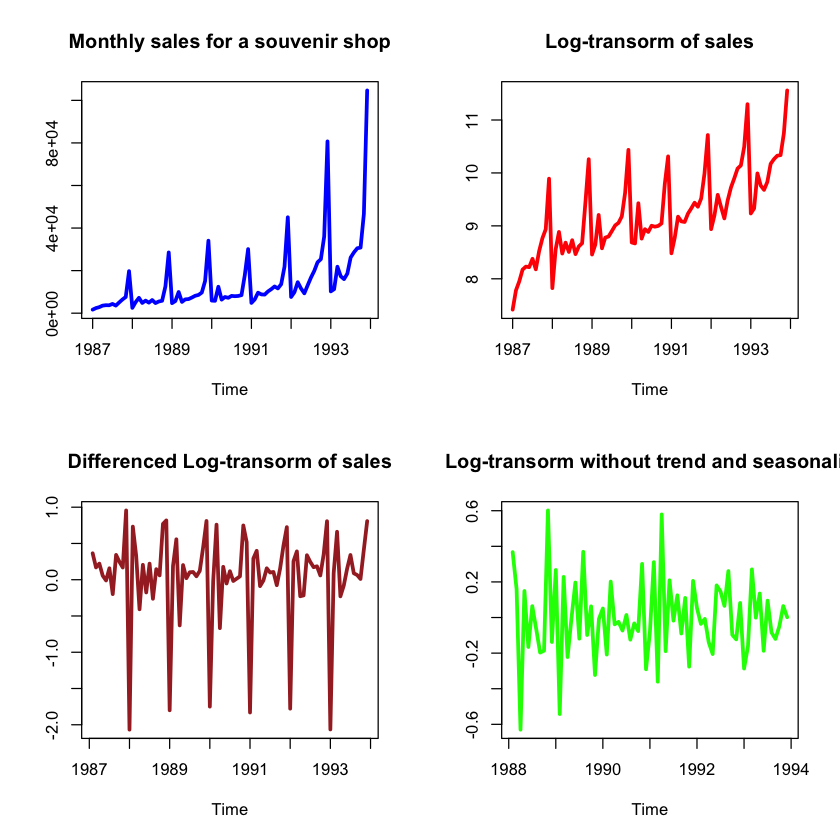

In [43]:
par(mfrow=c(2,2))

plot(suv, main='Monthly sales for a souvenir shop', ylab='', col='blue', lwd=3)
plot(log(suv), main='Log-transorm of sales', ylab='', col='red', lwd=3)
plot(diff(log(suv)), main='Differenced Log-transorm of sales', ylab='', col='brown', lwd=3)
plot(diff(diff(log(suv)),12), main='Log-transorm without trend and seasonaliy', ylab='', col='green', lwd=3)

ACF,PACF
-0.46,-0.46
0.19,-0.02
-0.17,-0.11
-0.06,-0.23
0.01,-0.13
0.00,-0.07
-0.07,-0.20
0.07,-0.12
0.09,0.11
0.02,0.11


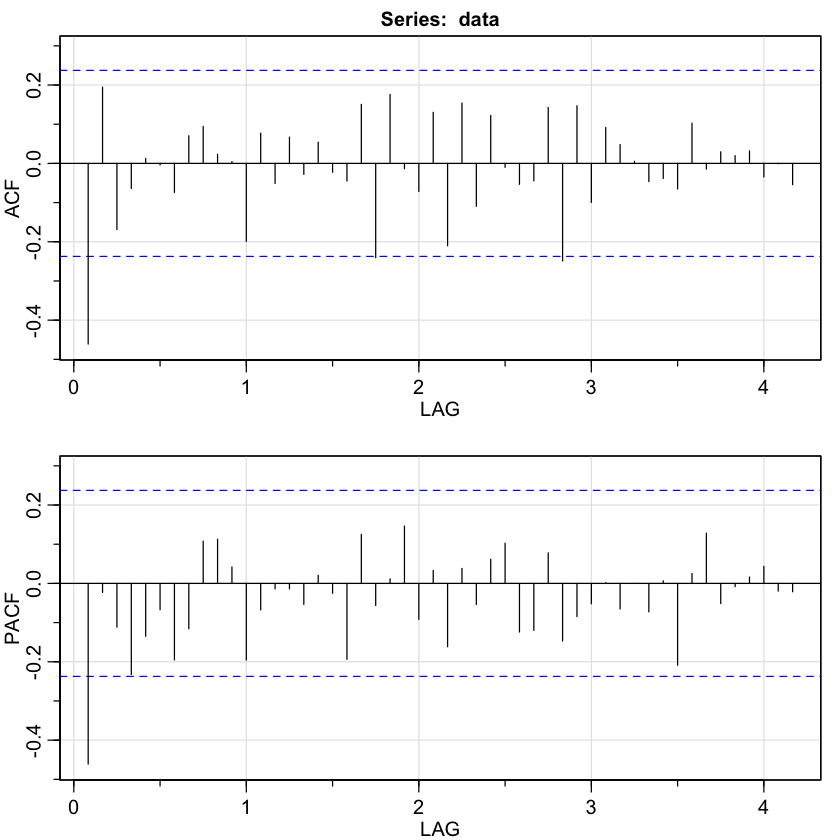

In [44]:
data<-diff(diff((log(suv)),12))
acf2(data, 50)

In [45]:
d=1
DD=1
per=12
for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(suv), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365568 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.977559  p-VALUE= 3.149961e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301947  p-VALUE= 0.0002456512 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392286 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083829e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399748  p-VALUE= 0.0001916571 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349898  p-VALUE= 0.0002477786 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302025  p-VALUE= 0.0004504596 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742485 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730773 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.10948  p-VALUE= 0.2830601 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.2700422 
0 1 1 1 1 0 12 AIC= -32.33191  SSE= 2.360508  p-VALUE= 0.2584528 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843227 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856357  p-VALUE= 0.2

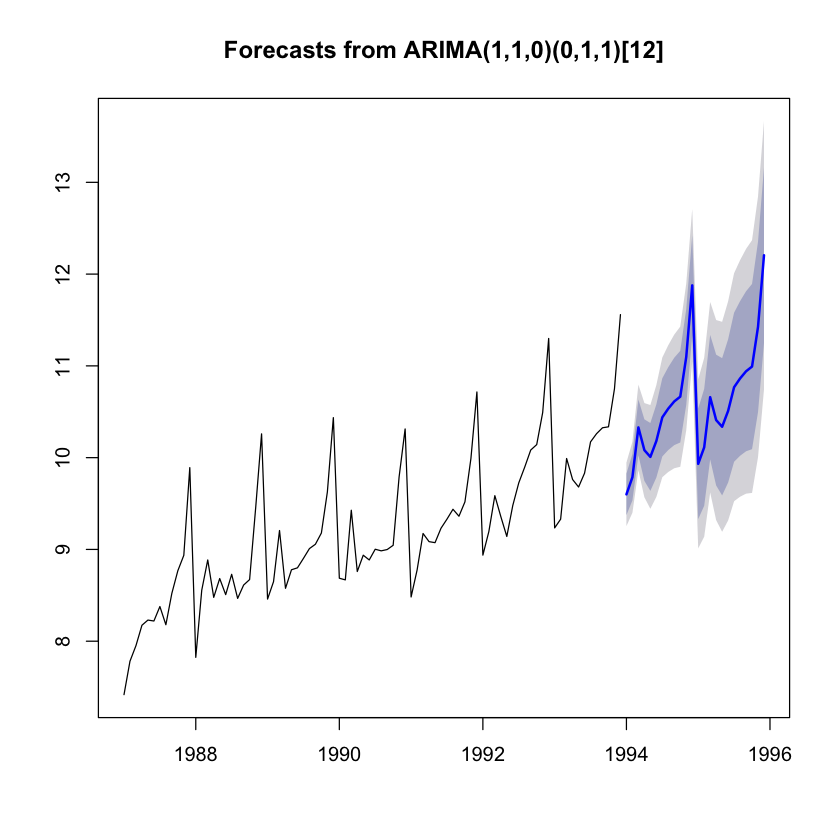

In [46]:
model<- arima(x=log(suv), order = c(1,1,0), seasonal = list(order=c(0,1,1), period=12))

plot(forecast(model))

In [47]:
forecast(model)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 1994       9.600019  9.373967  9.826071  9.254303  9.945736
Feb 1994       9.786505  9.533944 10.039066  9.400246 10.172764
Mar 1994      10.329605 10.025423 10.633786  9.864399 10.794810
Apr 1994      10.081973  9.746705 10.417240  9.569225 10.594720
May 1994      10.008096  9.638604 10.377587  9.443007 10.573184
Jun 1994      10.181170  9.783094 10.579245  9.572365 10.789974
Jul 1994      10.439372 10.013362 10.865383  9.787845 11.090900
Aug 1994      10.534857 10.083237 10.986477  9.844164 11.225551
Sep 1994      10.613026 10.136886 11.089165  9.884833 11.341218
Oct 1994      10.664526 10.165207 11.163846  9.900883 11.428170
Nov 1994      11.096784 10.575248 11.618321 10.299163 11.894406
Dec 1994      11.877167 11.334355 12.419979 11.047007 12.707327
Jan 1995       9.932756  9.330373 10.535139  9.011491 10.854022
Feb 1995      10.112194  9.475681 10.748707  9.138731 11.085657
Mar 1995      10.658829  9.980844 11.336

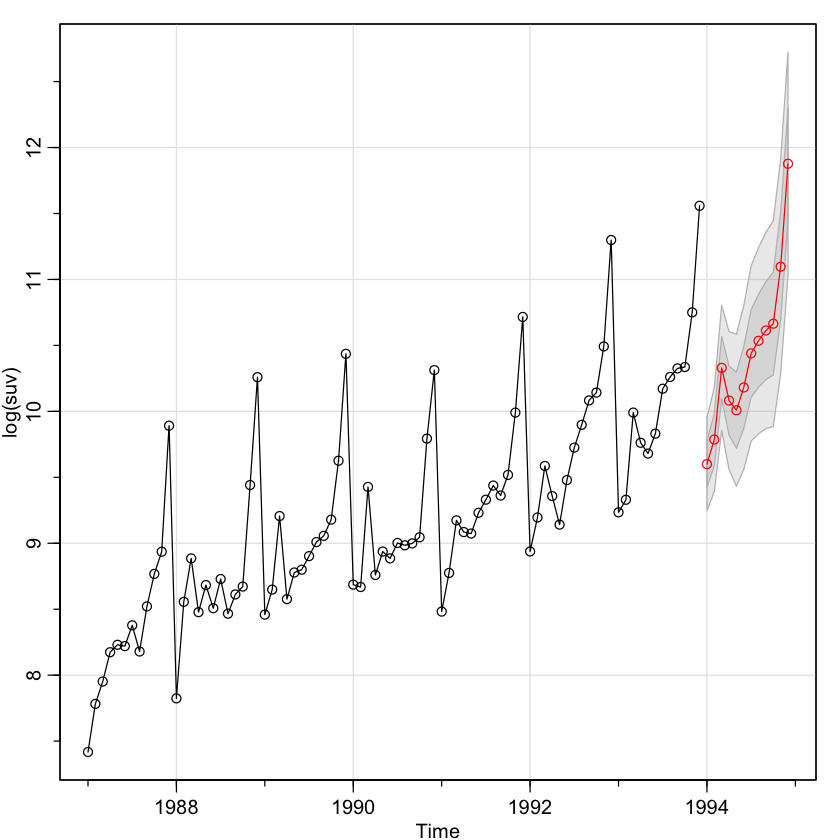

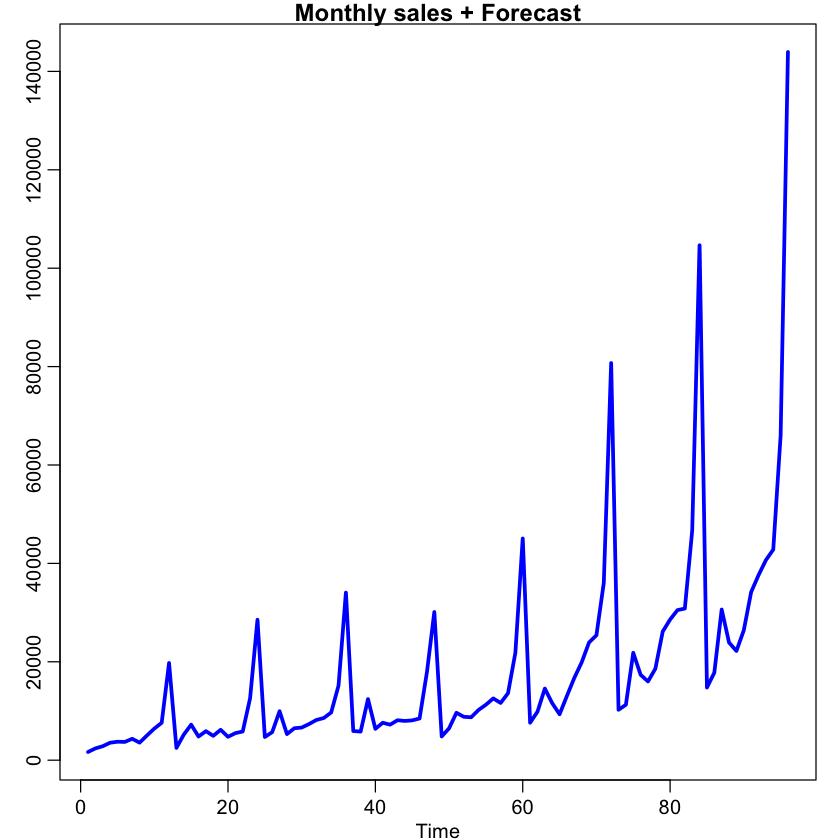

In [48]:
a<-sarima.for(log(suv),12,1,1,0,0,1,1,12)

plot.ts(c(suv,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)

#### Forecating using Smple Expontential Smoothing

In [3]:
rain.data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
rain.ts   <- ts(rain.data, start=c(1813))

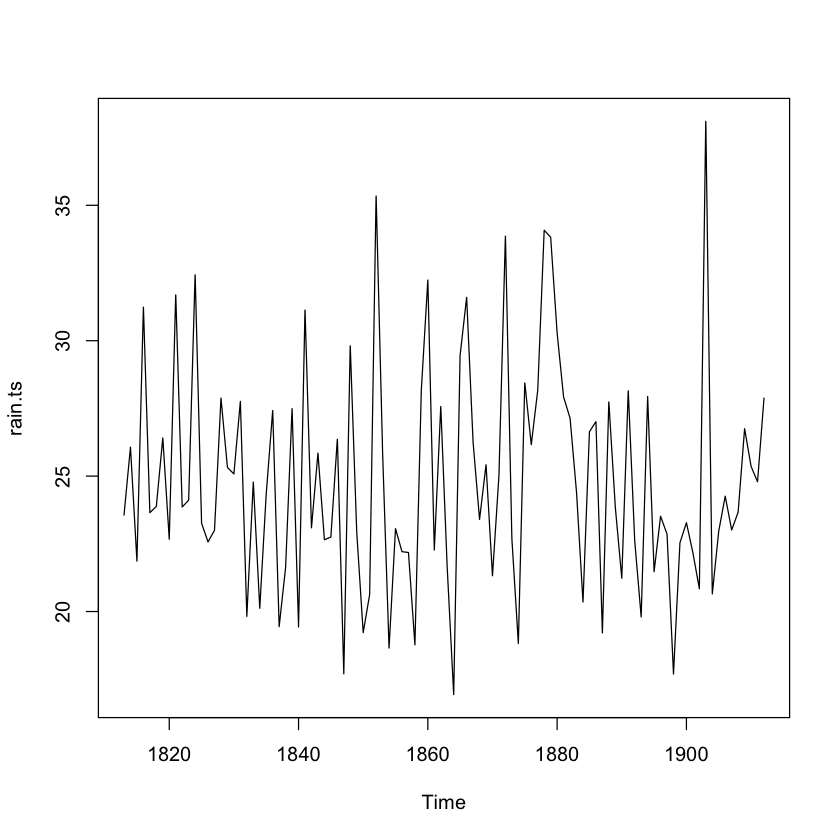

In [5]:
plot(rain.ts)

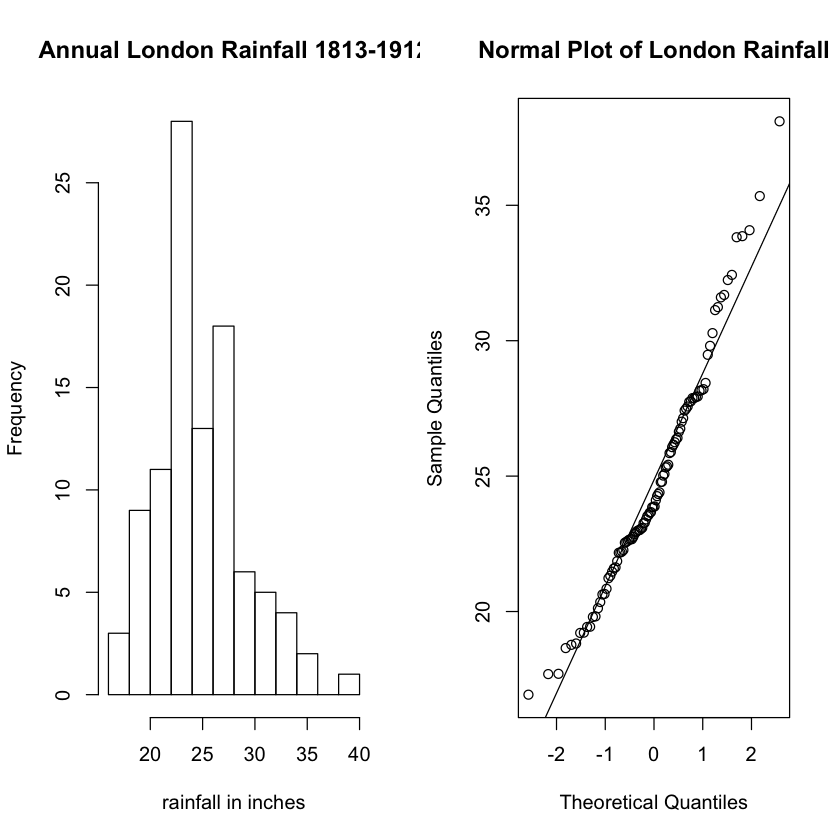

In [4]:
par( mfrow=c(1,2) )
hist(rain.data, main="Annual London Rainfall 1813-1912",
xlab="rainfall in inches")
qqnorm(rain.data,main="Normal Plot of London Rainfall")
qqline(rain.data)

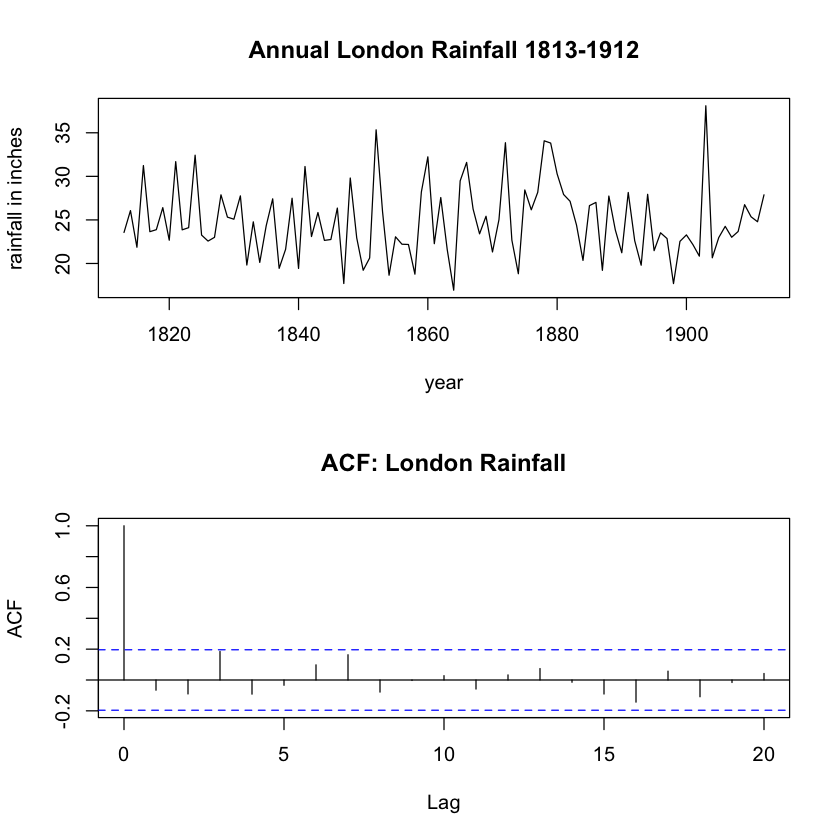

In [6]:
par( mfrow=c(2,1) )
plot.ts(rain.ts, main="Annual London Rainfall 1813-1912",
xlab="year", ylab="rainfall in inches")
acf(rain.ts, main="ACF: London Rainfall")

In [7]:
library(forecast)
auto.arima(rain.ts)

Warning message:
“package ‘forecast’ was built under R version 3.5.2”

Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

In [8]:
alpha=.2 #increase alpha for more rapid decay
forecast.values = NULL #establish array to store forecast values
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]
#loop to create all forecast values
for( i in 1:n ) {
forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
}
paste("forecast for time",n+1," = ", forecast.values [n+1])

[1] "forecast for time 101  =  25.3094062064236"

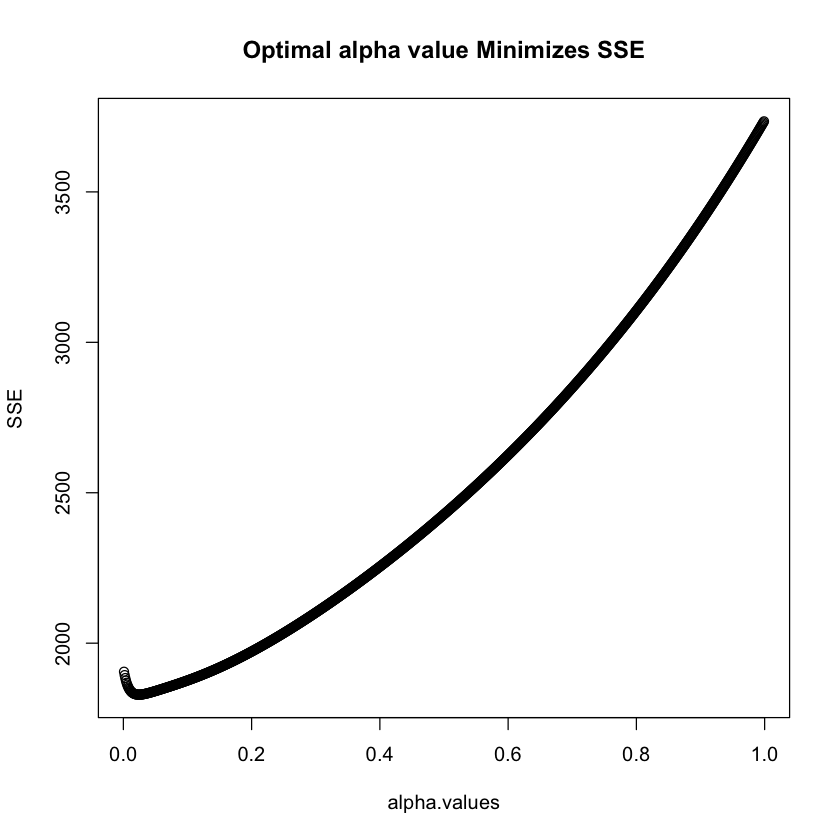

In [9]:
SSE=NULL
n = length(rain.data)
alpha.values = seq( .001, .999, by=0.001)
number.alphas = length(alpha.values)
for( k in 1:number.alphas ) {
 forecast.values=NULL
 alpha = alpha.values[k]
 forecast.values[1] = rain.data[1]
 for( i in 1:n ) {
 forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
 }
 SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
plot(SSE~alpha.values, main="Optimal alpha value Minimizes SSE")

In [10]:
index.of.smallest.SSE = which.min(SSE) #returns position 24
alpha.values[which.min(SSE)] #returns 0.024

[1] 0.024

In [11]:
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

In [4]:
data("AirPassengers")

In [5]:
AirPassengers.SES = HoltWinters( log10(AirPassengers), beta=FALSE, gamma=FALSE )

In [6]:
AirPassengers.SES$SSE

[1] 0.3065102

In [7]:
AirPassengers.HW = HoltWinters( log10(AirPassengers) )

In [8]:
AirPassengers.HW$SSE

[1] 0.0383026

In [10]:
AirPassengers.HW$coefficients

a            b           s1           s2           s3           s4 
 2.680598830  0.003900787 -0.031790733 -0.061224237 -0.015941495  0.006307818 
          s5           s6           s7           s8           s9          s10 
 0.014138008  0.067260071  0.127820295  0.119893006  0.038321663 -0.014181699 
         s11          s12 
-0.085995400 -0.044672707

In [14]:
AirPassengers.hw       <- HoltWinters(log10(AirPassengers))


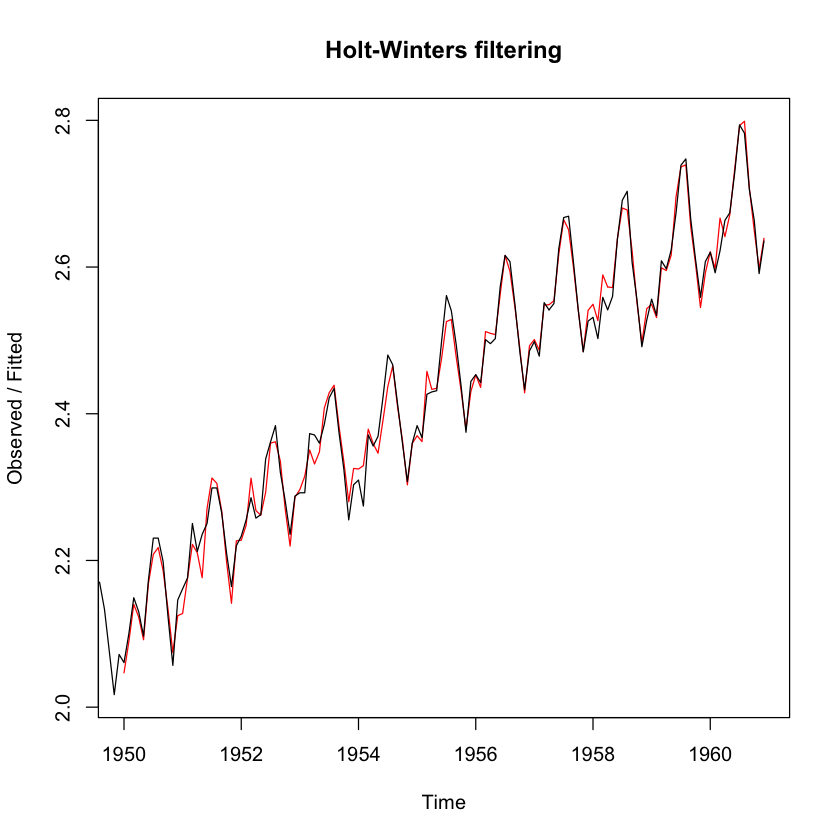

In [31]:
plot(AirPassengers.hw)